# Assignment 1 
## Anubhav a1812913

## All Imports

In [25]:
#import Libraries"
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #Importing Stop Words
#Tokenize the words
nltk.download('punkt')
from nltk.tokenize import word_tokenize #to TOkenize the words
# import lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re



# Load libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import nltk
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import learning_curve
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import hstack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANOMALY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANOMALY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANOMALY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ANOMALY\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ANOMALY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1. Reading datasets

In [2]:
#Reading data
train_text = []
with open('reviews_train.txt', encoding='latin-1') as f:
    train_text = f.readlines()
# train_text

#reading data for testing 
test_text = []
with open('reviews_test.txt', encoding='latin-1') as f:
    test_text = f.readlines()
# test_text


#Split the sentences toextract the labels
token_words_train = [line.split() for line in train_text]
token_words_test = [line.split() for line in test_text]



#Seperating words into labels and training data
train_data = [i[1:-1] for i in token_words_train]
temp_train_labels = [i[0] for i in token_words_train]
train_labels = [word.replace('__label__1', 'negative').replace('__label__2', 'positive') for word in temp_train_labels]
test_data = [i[1:-1] for i in token_words_test]
temp_test_labels = [i[0] for i in token_words_test]
test_labels = [word.replace('__label__1', 'negative').replace('__label__2', 'positive') for word in temp_test_labels]
train_data = [" ".join(word) for word in train_data if word != '']
test_data = [" ".join(word) for word in test_data if word != '']

## 2. Pre-processing

In [3]:
#Remove punctuation and all non-alphanumaric characters
rm_punct_train = [line.translate(line.maketrans('', '', string.punctuation)) for line in train_data]
rm_punct_test = [line.translate(line.maketrans('', '', string.punctuation)) for line in test_data]
# rm_punct_train = [[word for word in line if word.isalnum()] for line in rm_stp_train]
# rm_punct_test = [[word for word in line if word.isalnum()] for line in rm_stp_test]

# Tokenize the sentences
token_words_train = [word_tokenize(text) for text in rm_punct_train]
token_words_test = [word_tokenize(text) for text in rm_punct_test]

#Remove all non-alphanumaric characters
rm_nonalpha_train = [[re.sub(r'[^a-zA-Z0-9]','',i)for i in line ] for line in token_words_train]
rm_nonalpha_test = [[re.sub(r'[^a-zA-Z0-9]', '', i) for i in line] for line in token_words_test]

#Remove Stop words
stop_words = set(stopwords.words('english'))
rm_stp_train  = [[word for word in line if word.lower() not in stop_words]for line in rm_nonalpha_train]
rm_stp_test = [[word for word in line if word.lower() not in stop_words]for line in rm_nonalpha_test]


#Creating Version 1
train_version1 = rm_stp_train
test_version1 = rm_stp_test

#Performing lowercasing of words on version1 for Version 2
train_version2 = [[word.lower() for word in line]for line in train_version1]
test_version2 = [[word.lower() for word in line]for line in test_version1]

#Performing Lemmatization of words on version2 for Version 3

train_version3 = [[lemmatizer.lemmatize(word) for word in line]for line in train_version2]
test_version3 = [[lemmatizer.lemmatize(word) for word in line]for line in test_version2]

In [4]:
#Printing Shapes of both Versions
print(f"Shape of Version 1 Training : {len(train_version1)}\n")
print(f"Shape of Version 1 Testing : {len(test_version1)}\n")
print(f"Shape of Version 2 Training : {len(train_version2)}\n")
print(f"Shape of Version 2 Testing : {len(test_version2)}\n")
print(f"Shape of Version 3 Training : {len(train_version3)}\n")
print(f"Shape of Version 3 Testing : {len(test_version3)}\n")

Shape of Version 1 Training : 300000

Shape of Version 1 Testing : 100000

Shape of Version 2 Training : 300000

Shape of Version 2 Testing : 100000

Shape of Version 3 Training : 300000

Shape of Version 3 Testing : 100000



## 3. Dataset analysis

### 3.1 Checking Proportion of Positive : Negative Labels

Showing graphically the proportions of the labels in the Training dataset
AxesSubplot(0.125,0.11;0.775x0.77)
Count of Positive & Negative labels in Training Set
negative    150302
positive    149698
Name: Lables, dtype: int64


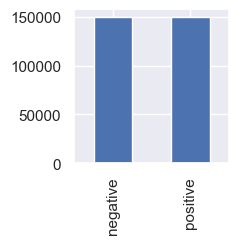

In [5]:
# Checking proportion of Positive to negative sentiment
import matplotlib.pyplot as plt 
import pandas as pd 
# Plot setup 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
# mpl.rc ( 'axes' , labelsize= 7 ) 
# mpl.rc ( 'xtick' , labelsize= 6 ) 
# mpl.rc ( 'ytick' , labelsize= 6 ) 
# mpl.rc ( 'figure' , dpi= 240 ) 
plt.close ( 'all' ) 

import seaborn as sns
import plotly.express as px 
train_label_df = pd.DataFrame ( train_labels , columns = [ 'Lables' ]) 
test_label_df = pd.DataFrame ( test_labels , columns = [ 'Lables' ]) 
sns. set () 
print ( "Showing graphically the proportions of the labels in the Training dataset" ) 
print ( train_label_df [ 'Lables' ] .value_counts () .plot ( kind= 'bar' , figsize= ( 2 , 2 ))) 
train_negative = train_label_df [ 'Lables' ] .value_counts ()[0]
train_positive = train_label_df [ 'Lables' ] .value_counts ()[1]
print("Count of Positive & Negative labels in Training Set")
print ( train_label_df [ 'Lables' ] .value_counts ())

Showing graphically the proportions of the labels in the Testing dataset
AxesSubplot(0.125,0.11;0.775x0.77)
Count of Positive & Negative labels in Testing Set
positive    50302
negative    49698
Name: Lables, dtype: int64


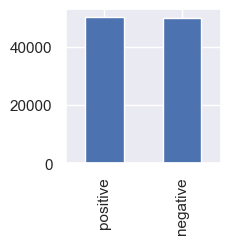

In [6]:
sns.set() 
print("Showing graphically the proportions of the labels in the Testing dataset") 
print(test_label_df['Lables'].value_counts().plot(kind='bar',figsize=(2,2))) 
print("Count of Positive & Negative labels in Testing Set")
print(test_label_df['Lables'].value_counts())
test_negative = test_label_df [ 'Lables' ] .value_counts ()[1]
test_positive = test_label_df [ 'Lables' ] .value_counts ()[0]

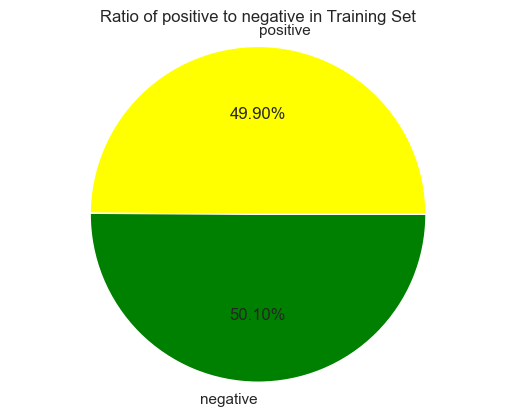

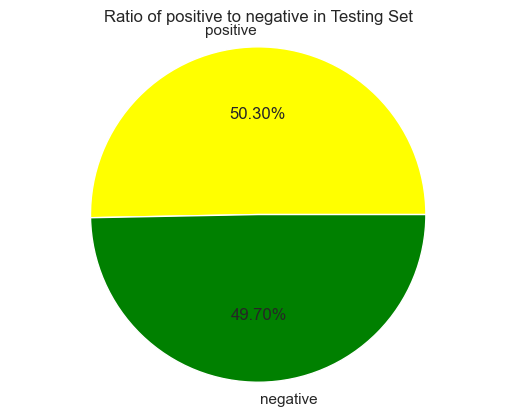

In [7]:
labels= ['positive', 'negative']
colors=['yellow','green']
sizes= [train_positive,train_negative]
# plt.figure(figsize=(5,5))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Ratio of positive to negative in Training Set')
plt.axis('equal')
plt.show()


labels= ['positive', 'negative']
colors=['yellow','green']
sizes= [test_positive,test_negative]
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Ratio of positive to negative in Testing Set')
plt.axis('equal')
plt.show()

#### Discussion

Upon analyzing the dataset we find both training and testing set have balanced proportion of positive and negative sentiments
Training Set has 49.9% : 50.1% (Positive to Negative)
Testing Set has 50.3% : 49.7% (Positive to )

In case of dataset being imbalanced the proportion difference of positive and negative labels in the training and testing set can have a significant impact on classification performance and the selection of performance metrics. When there is a significant difference in the proportion of positive and negative labels in the training set, it can lead to bias in the model's predictions towards the majority class, resulting in poor performance for the minority class.In such scenarios, performance metrics like accuracy may not be the best indicator of model performance. Metrics like precision, recall, and F1-score that take into account both false positives and false negatives can provide a more comprehensive assessment of the model's performance. 

the proportion of positive and negative labels is almost equal in both the training and testing sets, then the class imbalance problem is less likely to occur. In this case, performance metrics like accuracy, precision, recall, and F1-score can perform effective in assessing the model's performance.

As the dataset is balanced the standard performance metrics can be used to assess the model's performance.



## 3.2 Checking Unique words present in each Version 


Unique words in version1 of the TrainDataset : 481138 
Unique words in version2 of the TrainDataset : 395037 
Unique words in version3 of the TrainDataset : 380700 

Unique words in version1 of the TestDataset : 230073 
Unique words in version2 of the TestDataset : 188433 
Unique words in version3 of the TestDataset : 178305 



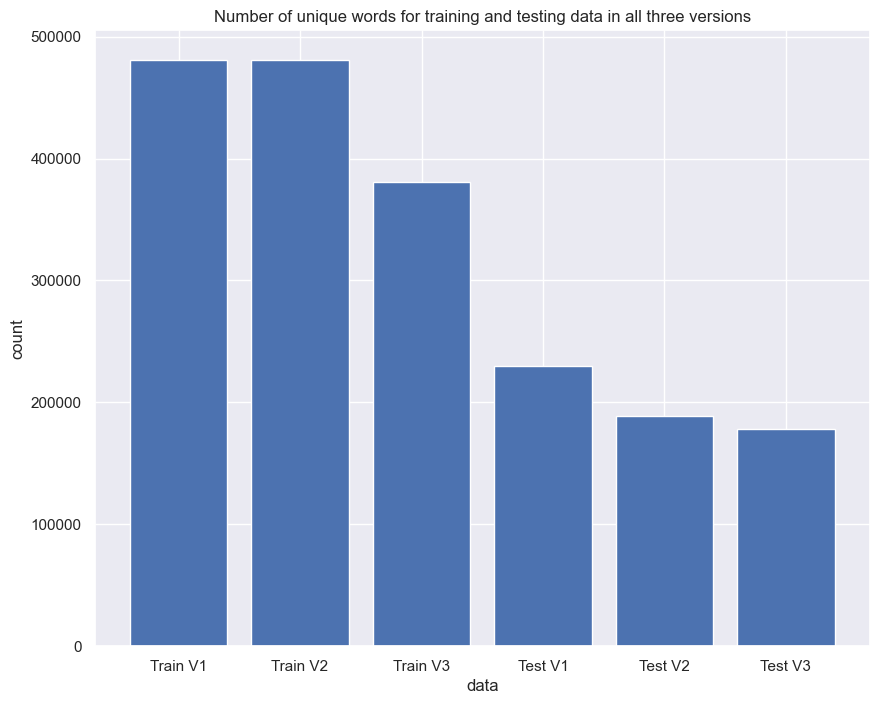

In [56]:
def unique_dict(data):
  uniqe_version = {} 
  for line in data : 
    for j in line : 
      if j in uniqe_version.keys():
        uniqe_version [ j ] += 1
      else :
        uniqe_version [ j ] = 1
  return uniqe_version
#Finding out Unique words in All Versions across train & test sets
uniqe_version1_train = unique_dict(train_version1)
uniqe_version2_train = unique_dict(train_version2)
uniqe_version3_train = unique_dict(train_version3)
uniqe_version1_test = unique_dict(test_version1)
uniqe_version2_test = unique_dict(test_version2)
uniqe_version3_test = unique_dict(test_version3)
print ( f"\nUnique words in version1 of the TrainDataset : { len ( uniqe_version1_train )} " ) 
print ( f"Unique words in version2 of the TrainDataset : { len ( uniqe_version2_train )} " ) 
print ( f"Unique words in version3 of the TrainDataset : { len ( uniqe_version3_train )} " )
print ( f"\nUnique words in version1 of the TestDataset : { len ( uniqe_version1_test )} " ) 
print ( f"Unique words in version2 of the TestDataset : { len ( uniqe_version2_test )} " ) 
print ( f"Unique words in version3 of the TestDataset : { len ( uniqe_version3_test )} \n" )

# plot the bar chart of training and testing data in all three versions
data = ['Train V1', 'Train V2', 'Train V3', 'Test V1', 'Test V2', 'Test V3']
count = [len(uniqe_version1_train), len(uniqe_version1_train), len(uniqe_version3_train), len(uniqe_version1_test), len(uniqe_version2_test), len(uniqe_version3_test)]
plt.figure(figsize=(10,8))
plt.bar(data, count)
plt.xlabel('data')
plt.ylabel('count')
plt.title('Number of unique words for training and testing data in all three versions')
plt.show()

In [9]:
# !pip install wordcloud 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
#Word Cloud for unique words in VERSION 1 
def disp_wordCloud(title,dict,max_words=1000):
  plt.figure(figsize=(5,6))
  wordcloud = WordCloud (background_color="black",max_words=1000).generate_from_frequencies (dict)
  plt.imshow ( wordcloud , interpolation= 'bilinear' ) 
  plt.axis ( "off" ) 
  plt.title ( f"Word Cloud for unique wors in {title}" ) 
  plt.imshow (wordcloud.recolor(colormap='Pastel2', random_state=17), alpha=0.98)



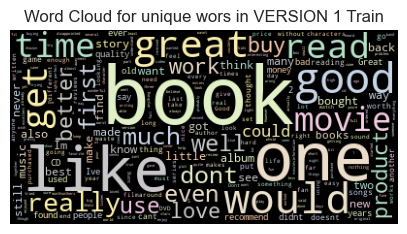

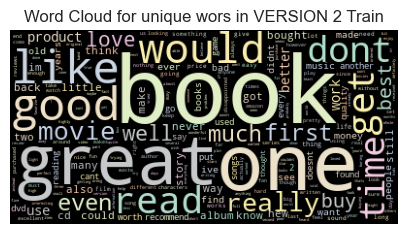

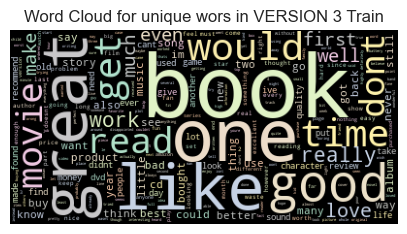

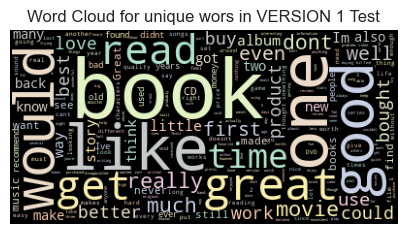

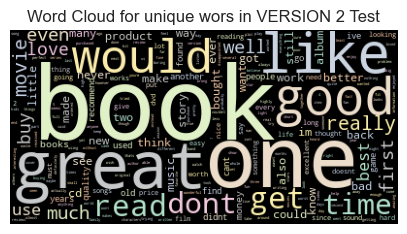

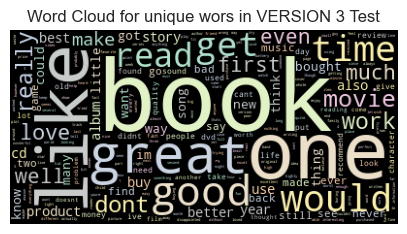

In [43]:
title = "VERSION 1 Train"
disp_wordCloud(title,uniqe_version1_train,max_words=1000)

title = "VERSION 2 Train"
disp_wordCloud(title,uniqe_version2_train,max_words=1000)

title = "VERSION 3 Train"
disp_wordCloud(title,uniqe_version3_train,max_words=1000)

title = "VERSION 1 Test"
disp_wordCloud(title,uniqe_version1_test,max_words=1000)

title = "VERSION 2 Test"
disp_wordCloud(title,uniqe_version2_test,max_words=1000)

title = "VERSION 3 Test"
disp_wordCloud(title,uniqe_version3_test,max_words=1000)

#### Discussion

| Dataset Version | Unique Wordcount |
|-----------------|------------------|
| Train Ver1      | 481138           |
| Train Ver2      | 395037           |
| Train Ver3      | 380700           |
| Test Ver1       | 230073           |
| Test Ver2       | 188433           |
| Test Ver3       | 178305           |

From above table we can clearly see unique word count decreases across versions, this is due to out preprocessing steps wherein we remove the punctuations, stopwords and apply lemmatizations which decrease the word count.




### 4. Sentiment classification using Machine Learning

In [44]:
#Converting list of Tokenks into sentences
sen_train_version1 = [" ".join(word) for word in train_version1 if word != '']
sen_train_version2 = [" ".join(word) for word in train_version2 if word != ""]
sen_train_version3 = [" ".join(word) for word in train_version3 if word != ""]


sen_test_version1 = [" ".join(word) for word in test_version1 if word != ""]
sen_test_version2 = [" ".join(word) for word in test_version2 if word != ""]
sen_test_version3 = [" ".join(word) for word in test_version3 if word != ""]
sen_train_version1[0]

'Almost Completely Useless impossible keep Ethernet cord plugged device slides use tape zip ties Popsicle stick keep plugged Terrible'

In [61]:
def train_test_accuracies(model,x_train,y_train,x_test,y_test,v1 = False):
  if v1 == True:
    count = CountVectorizer(lowercase=False)
  else:
    count = CountVectorizer()
  # Transforming the datasets
  X_train_bag_of_words = count.fit_transform(x_train)
  X_test_bag_of_words = count.transform(x_test)
  # getting training anv validation scores
  cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

  #Using model to classify
  model.fit(X_train_bag_of_words, y_train)
  scores = cross_validate(model, X_train_bag_of_words, y_train, cv=cv, scoring="accuracy" , return_train_score=True)
  avg_val_acc = sum(scores['test_score'])/5
  avg_train_acc = sum(scores['train_score'])/5
  y_pred = model.predict(X_test_bag_of_words)
  test_acc = accuracy_score(y_test, y_pred)
    # Calculate learning curve
  train_sizes, train_scores, val_scores = learning_curve(
      model, X_train_bag_of_words, y_train, cv=5, scoring='accuracy', n_jobs=-1,
      train_sizes=np.linspace(0.1, 1.0, 10)
)

  # Plot learning curve
  plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training accuracy')
  plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation accuracy')
  plt.title('Learning Curve')
  plt.xlabel('Training Set Size')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  return (avg_train_acc,avg_val_acc,test_acc)


Version 1:



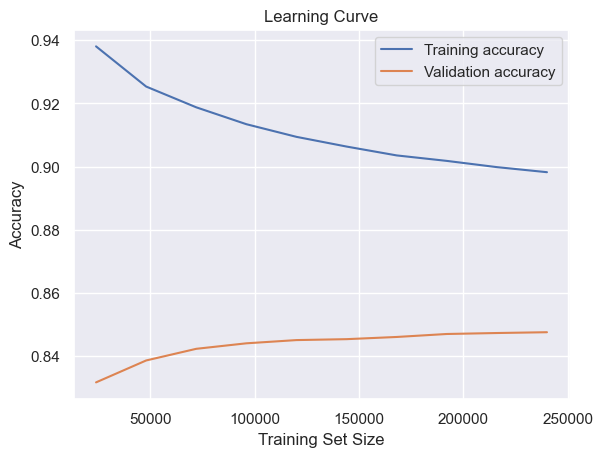

Average  Validation Accuracy score : 0.8477699999999999
Average  Training Accuracy score : 0.8982175000000001
Testing Accuracy score : 0.84677

Version 2:



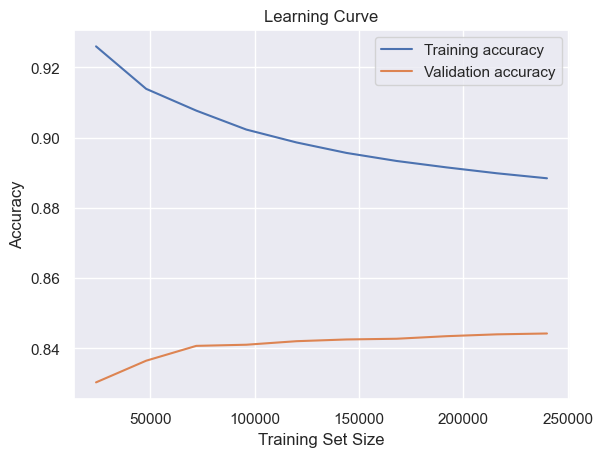

Average  Validation Accuracy score : 0.8444233333333333
Average  Training Accuracy score : 0.8883658333333333
Testing Accuracy score : 0.84438

Version 3:



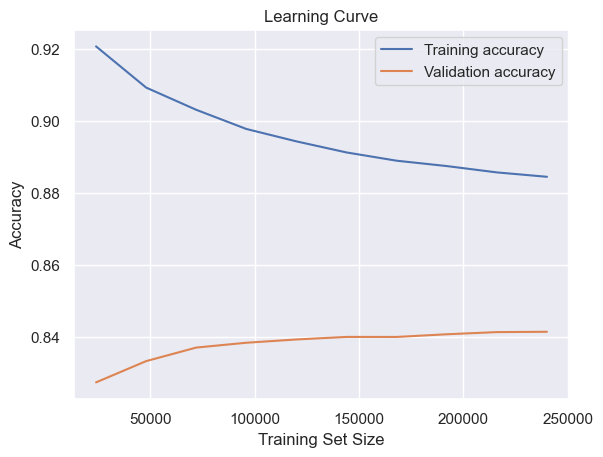

Average  Validation Accuracy score : 0.8417299999999999
Average  Training Accuracy score : 0.8844325
Testing Accuracy score : 0.84162
Classification results using MultinomialNB 


,,Training,Validation,Testing
0,Version 1,0.898218,0.847770,0.84677
1,Version 2,0.888366,0.844423,0.84438
2,Version 3,0.884432,0.841730,0.84162


In [62]:
clf = MultinomialNB()
print("\nVersion 1:\n")
V1 = train_test_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels,True)
print(f"Average  Validation Accuracy score : {V1[1]}")
print(f"Average  Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[2]}")

print("\nVersion 2:\n")
V2 = train_test_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Average  Validation Accuracy score : {V2[1]}")
print(f"Average  Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[2]}")

print("\nVersion 3:\n")
V3 = train_test_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels)
print(f"Average  Validation Accuracy score : {V3[1]}")
print(f"Average  Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[2]}")

All_train_acc =[V1[0],V2[0],V3[0]]
All_Val_acc =[V1[1],V2[1],V3[1]]
All_test_acc =[V1[2],V2[2],V3[2]]
row_labels = ["Version 1","Version 2","Version 3"]

print("Classification results using MultinomialNB ")
MultinomialNB_df = pd.DataFrame(list(zip(row_labels,All_train_acc,All_Val_acc,All_test_acc)),columns = ["","Training","Validation","Testing"])
MultinomialNB_df


Version 1:



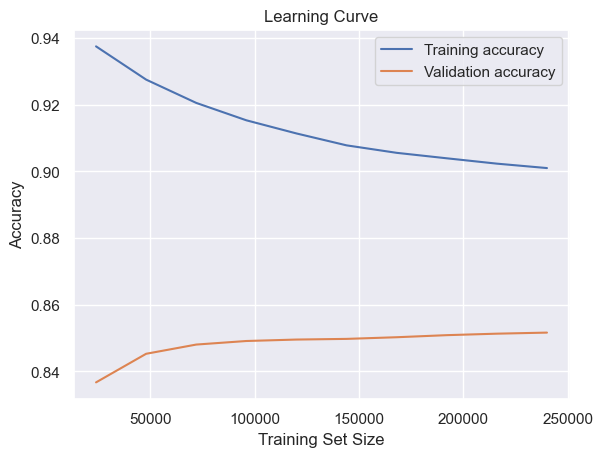

Average  Validation Accuracy score : 0.85169
Average  Training Accuracy score : 0.9009316666666667
Testing Accuracy score : 0.85219

Version 2:



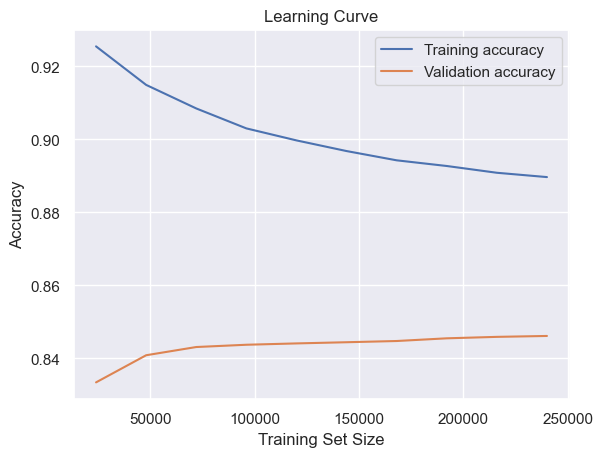

Average  Validation Accuracy score : 0.84634
Average  Training Accuracy score : 0.8895866666666666
Testing Accuracy score : 0.84618

Version 3:



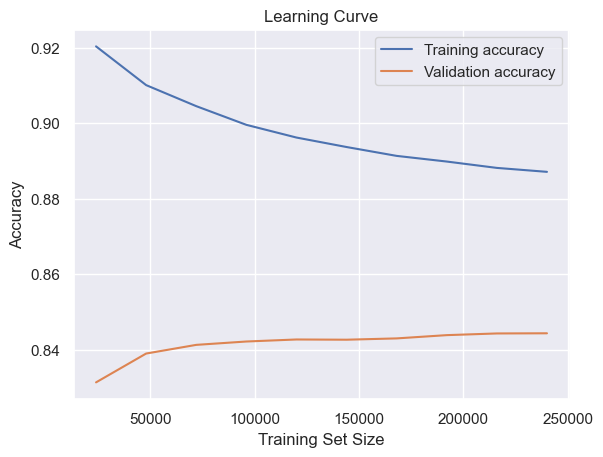

Average  Validation Accuracy score : 0.84433
Average  Training Accuracy score : 0.8870758333333333
Testing Accuracy score : 0.84507
Classification results using BernoulliNB 


,,Training,Validation,Testing
0,Version 1,0.900932,0.85169,0.85219
1,Version 2,0.889587,0.84634,0.84618
2,Version 3,0.887076,0.84433,0.84507


In [63]:
clf = BernoulliNB()
print("\nVersion 1:\n")
V1 = train_test_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels,True)
print(f"Average  Validation Accuracy score : {V1[1]}")
print(f"Average  Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[2]}")

print("\nVersion 2:\n")
V2 = train_test_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Average  Validation Accuracy score : {V2[1]}")
print(f"Average  Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[2]}")

print("\nVersion 3:\n")
V3 = train_test_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels)
print(f"Average  Validation Accuracy score : {V3[1]}")
print(f"Average  Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[2]}")

All_train_acc =[V1[0],V2[0],V3[0]]
All_Val_acc =[V1[1],V2[1],V3[1]]
All_test_acc =[V1[2],V2[2],V3[2]]
row_labels = ["Version 1","Version 2","Version 3"]

print("Classification results using BernoulliNB ")
BernoulliNB_df = pd.DataFrame(list(zip(row_labels,All_train_acc,All_Val_acc,All_test_acc)),columns = ["","Training","Validation","Testing"])
BernoulliNB_df


Version 1:



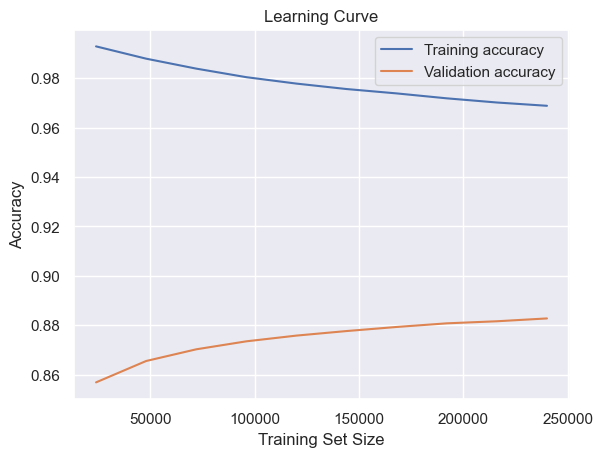

Average  Validation Accuracy score : 0.8822466666666667
Average  Training Accuracy score : 0.9687791666666667
Testing Accuracy score : 0.88401

Version 2:



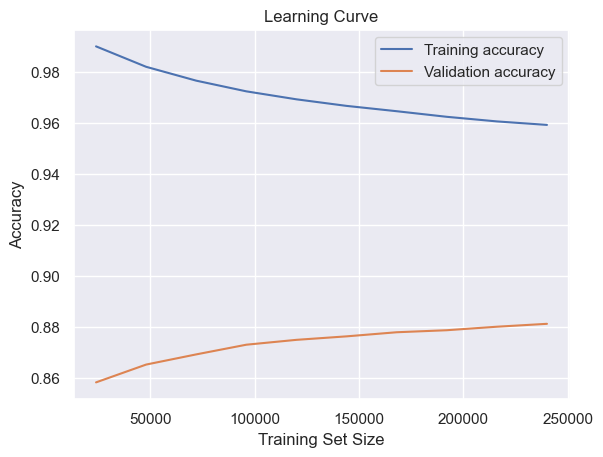

Average  Validation Accuracy score : 0.8811333333333333
Average  Training Accuracy score : 0.9591008333333335
Testing Accuracy score : 0.88369

Version 3:



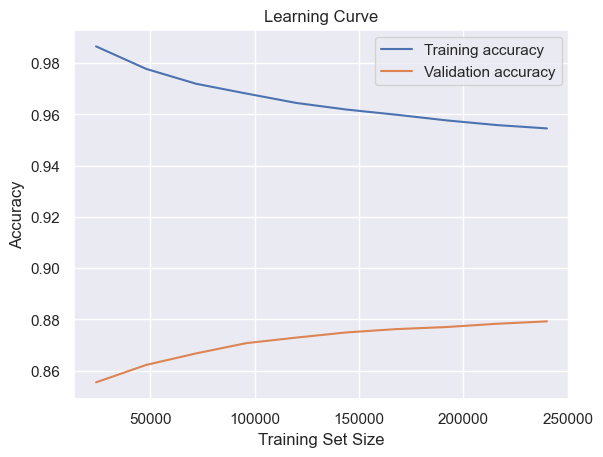

Average  Validation Accuracy score : 0.87905
Average  Training Accuracy score : 0.9542949999999999
Testing Accuracy score : 0.88203
Classification results using LogisticRegression 


,,Training,Validation,Testing
0,Version 1,0.968779,0.882247,0.88401
1,Version 2,0.959101,0.881133,0.88369
2,Version 3,0.954295,0.879050,0.88203


In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', random_state=0)
print("\nVersion 1:\n")
V1 = train_test_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels,True)
print(f"Average  Validation Accuracy score : {V1[1]}")
print(f"Average  Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[2]}")

print("\nVersion 2:\n")
V2 = train_test_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Average  Validation Accuracy score : {V2[1]}")
print(f"Average  Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[2]}")

print("\nVersion 3:\n")
V3 = train_test_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels)
print(f"Average  Validation Accuracy score : {V3[1]}")  
print(f"Average  Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[2]}")

All_train_acc =[V1[0],V2[0],V3[0]]
All_Val_acc =[V1[1],V2[1],V3[1]]
All_test_acc =[V1[2],V2[2],V3[2]]
row_labels = ["Version 1","Version 2","Version 3"]

print("Classification results using LogisticRegression ")
LogisticRegression_df = pd.DataFrame(list(zip(row_labels,All_train_acc,All_Val_acc,All_test_acc)),columns = ["","Training","Validation","Testing"])
LogisticRegression_df

In [67]:
print("Performance of MultinomialNB")
display(MultinomialNB_df)
print("Performance of BernoulliNB")
display(BernoulliNB_df)
print("Performance of Logistic Regression")
display(LogisticRegression_df)


Performance of MultinomialNB


,,Training,Validation,Testing
0,Version 1,0.898218,0.847770,0.84677
1,Version 2,0.888366,0.844423,0.84438
2,Version 3,0.884432,0.841730,0.84162


Performance of BernoulliNB


,,Training,Validation,Testing
0,Version 1,0.900932,0.85169,0.85219
1,Version 2,0.889587,0.84634,0.84618
2,Version 3,0.887076,0.84433,0.84507


Performance of Logistic Regression


,,Training,Validation,Testing
0,Version 1,0.968779,0.882247,0.88401
1,Version 2,0.959101,0.881133,0.88369
2,Version 3,0.954295,0.879050,0.88203


### Discussion

We tried 3 classification methods **Bernaulli NB:**, **Multinomial NB**, **Logistic Regression**

We employed cross - validation with 5 folds, and took the average accuracy score as the final metric for performance comparison of model on each version, furthermore we used stratified K fold to maintain the ratio of positive:negative for each fold.

**Bernaulli NB:** Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution.
Looking at Training and Validation curves for this model although in all 3 versions training accuracy is higher than validation accuracy it is very slightly if at all overfitting since the difference.On an average all 3 versions had a difference of 5% in their training and validtion scores.

Version 1 performed the best achieveing an training accuracy of 90% and a testing accuracy of 85%
All 3 versions performed relatively well with all of them achieveing an accuracy of 84%+.


**Multinomial NB:** The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.Looking at the accuracy curves for this model since the average training accuracy is pretty high it looks like the model is overfitting slightly.On an average all 3 versions had a difference of 5% in their training and validtion scores.

Version 1 performed the best achieveing an training accuracy of 89% and a testing accuracy of 84%
All 3 versions performed relatively well with all of them achieveing an accuracy of 84%+.

**Logistic Regression:** Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. Logistic regression is useful for sentiment analysis as it uses a sigmoid function to output a probability between zero and one.Looking at the curves there is clear slight overfitting with the training accuracy reaching 95% whereas validation only reaches 88%.On an average all 3 versions had a difference of 8% in their training and validtion scores.

Version 1 performed the best achieveing an training accuracy of 96% and a testing accuracy of 88%
All 3 versions performed relatively well with all of them achieveing an accuracy of 88%+.


***Overall Although Linear Regression performed the best it has slight overfitting and a long runtime. Both Bernaoulli and Multinomial NB performed equally impressively with each having highest training accuracy of almost 90% and testing accuracy of 84%+ with almost no overfitting. Going forward we will consider Bernaoulli NB as selected model for classification since it slightly outperforms MUltinomial.***

### 5. Sentiment classification using VADER sentiment lexicon

Use VADER sentiment lexicon/utility to classify the test set reviews into the polarity. 
Compare results with those obtained in point 4. Discuss the differences.

In [77]:
#Created a function 
def VADER_analysis(test):
  analyser = SentimentIntensityAnalyzer()
  y_pred = []
  for text in test:
      score = analyser.polarity_scores(text)
      if score['compound'] >= 0:
          y_pred.append("positive")
      else:
          y_pred.append("negative")
  return y_pred

def print_acc_metrics(y_pred,y_test):
  f1 = f1_score(y_test, y_pred, average="weighted")
  print(f"f1 score : {f1}")
  p = precision_score(y_test, y_pred, average="weighted")
  print(f"precision : {p}")
  r = recall_score(y_test, y_pred, average="weighted")
  print(f"recall : {r}")
  a = accuracy_score(y_test, y_pred)
  print(f"accuracy : {a}")
  return a

print("\nVersion 1:\n")
y_pred1 = VADER_analysis(sen_test_version1)
Vader_V1 = print_acc_metrics(y_pred1,test_labels)

print("\nVersion 2:\n")
y_pred2 = VADER_analysis(sen_test_version2)
Vader_V2 = print_acc_metrics(y_pred2,test_labels)

print("\nVersion 3:\n")
y_pred3 = VADER_analysis(sen_test_version3)
Vader_V3 = print_acc_metrics(y_pred3,test_labels)

All_test_acc =[Vader_V1,Vader_V2,Vader_V3]

row_labels = ["Version 1","Version 2","Version 3"]

print("Classification results using VADER ")
VADER_df = pd.DataFrame(list(zip(row_labels,All_test_acc)),columns = ["","Testing"])
VADER_df

Classification results using VADER 


,,Testing
0,Version 1,0.67254
1,Version 2,0.67266
2,Version 3,0.67272


### Discussion

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically designed for analyzing sentiment in social media texts. It uses a list of lexical features, including both unigrams and bigrams, along with a set of rules to determine the sentiment polarity of a given text. The sentiment polarity is measured on a scale of -1 to +1, where -1 represents extremely negative sentiment and +1 represents extremely positive sentiment.

In our code we use the "compound" score assigned by VADER to each sentence in test set and any line with score >= 0 is predicted as Positive class, otherwise it is predicted as negative class, Upon comparison of performance of VADER on testing set with out best performing classification model 
i.e. BeraulliNB we can conclude VADER performs extremely poorly with it only achieveing an highest of 67% testing accuracy for version 1, whereas BernaulliNB boasts an accuracy of 84%

VADER may not be as effective as BernaulliNB in capturing the nuances of the sentiment expressed in the reviews. VADER is a rule-based sentiment analysis tool, While VADER is specifically designed for analyzing sentiment in social media texts, it may not be as effective in analyzing sentiment in more complex and nuanced texts.In contrast, the Bernoulli classifier is a machine learning algorithm that is trained on a dataset of labeled examples to learn the relationship between the features of the text and the sentiment polarity. The Bernoulli classifier can capture more complex patterns in the text and can be customized to the specific domain and context of the text being analyzed. This may have contributed to the better performance of the Bernoulli classifier on your dataset.

***In conclusion while VADER is a useful sentiment analysis tool for analyzing sentiment in social media texts, it may not be as effective as machine learning algorithms like the Bernoulli classifier in analyzing sentiment in more complex and nuanced texts.While VADER relies solely on the presence of positive and negative words, whereas the BNB model uses a combination of features (such as word frequency and presence/absence of specific words) to classify.***

### 6. (optional challenge 3 points) Combine VADER with the classifier

(optional challenge up to 10/100 points) Combine VADER sentiment analysis output with the 
classification model. Classify best_data and compare with results with point 4

In [49]:
import scipy
import numpy as np
def calc_vader_sc (data):
    train_score = []
    analyser = SentimentIntensityAnalyzer()
    for line in data:
        score = analyser.polarity_scores(line)
        train_score.append([score['neg'], score['neu'], score['pos'], score['compound']])
    return train_score

def Vader_accuracies(model,x_train,y_train,x_test,y_test):
  #Running Vader for dataset
  analyser = SentimentIntensityAnalyzer()
  train_score = calc_vader_sc (x_train)
  norm_train_score = (train_score-np.min(train_score))/(np.max(train_score)-np.min(train_score))
  train_score_csr = scipy.sparse.csr_matrix(norm_train_score)
  test_score = calc_vader_sc (x_test)
  norm_test_score = (test_score-np.min(test_score))/(np.max(test_score)-np.min(test_score))
  test_score_csr = scipy.sparse.csr_matrix(norm_test_score)

  #Running Vectorizing training set
  count = CountVectorizer(lowercase=False)
  X_train_bag_of_words = count.fit_transform(x_train)
  X_test_bag_of_words = count.transform(x_test)

  #Concatinating VADER scores with vectorized Data to feed to model
  norm_train_score_vc = hstack([train_score_csr,X_train_bag_of_words])
  print(f"Train shape : {norm_train_score_vc.shape}")
  norm_test_score_vc = hstack([test_score_csr,X_test_bag_of_words])
  print(f"Test shape : {norm_test_score_vc.shape}")

  # # # getting training anv validation scores
  # cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

  #Using model to classify
  model.fit(norm_train_score_vc, y_train)
  # scores = cross_validate(model, norm_train_score_vc, y_train, cv=cv, scoring="accuracy" , return_train_score=True)
  y_pred = model.predict(norm_test_score_vc)
  test_acc = accuracy_score(y_test, y_pred)
  train_acc = accuracy_score(y_train, model.predict(norm_train_score_vc))


  return (train_acc,test_acc)


In [53]:
# Combining BernoulliNB and VADER

clf = BernoulliNB()

print("\nVersion 1:\n")
V1 = Vader_accuracies(clf,sen_train_version1,train_labels,sen_test_version1,test_labels)
print(f"Training Accuracy score : {V1[0]}")
print(f"Testing Accuracy score : {V1[1]}")

print("\nVersion 2:\n")
V2 = Vader_accuracies(clf,sen_train_version2,train_labels,sen_test_version2,test_labels)
print(f"Training Accuracy score : {V2[0]}")
print(f"Testing Accuracy score : {V2[1]}")

print("\nVersion 3:\n")
V3 = Vader_accuracies(clf,sen_train_version3,train_labels,sen_test_version3,test_labels) 
print(f"Training Accuracy score : {V3[0]}")
print(f"Testing Accuracy score : {V3[1]}")



Version 1:

Training Accuracy score : 0.8982333333333333
Testing Accuracy score : 0.85219

Version 2:

Training Accuracy score : 0.8871366666666667
Testing Accuracy score : 0.84618

Version 3:

Training Accuracy score : 0.8847966666666667
Testing Accuracy score : 0.84507


In [70]:
All_train_acc =[V1[0],V2[0],V3[0]]
All_test_acc =[V1[1],V2[1],V3[1]]

row_labels = ["Version 1","Version 2","Version 3"]

print("Classification results using LogisticRegression ")
BernoulliNB_VADER_df = pd.DataFrame(list(zip(row_labels,All_train_acc,All_test_acc)),columns = ["","Training","Testing"])
BernoulliNB_VADER_df

Classification results using LogisticRegression 


,,Training,Testing
0,Version 1,0.968779,0.882247
1,Version 2,0.959101,0.881133
2,Version 3,0.954295,0.879050


### Discussion

Combining the output of VADER sentiment analysis tool with the Bernoulli NB model can improve the performance of the sentiment analysis task. We can see a greater test accuracy accross all version.VADER is particularly good at capturing implicit sentiment, while the Bernoulli NB model can capture both explicit and implicit sentiment based on the features of the text.VADER and the Bernoulli NB model capture different aspects of sentiment polarity in the text. VADER relies on a pre-defined lexicon of sentiment words and rules to determine the sentiment polarity of a given text, while the Bernoulli NB model learns the relationship between the features of the text and the sentiment polarity based on a training dataset.

ALthough the highest Accuracy is achieved by Version1 getting 96% training accuracy and 88% testing accuracy, all versions have minor decrement with all versions having alost 88% testing accuracy.Although difference between trainng and testing accuracies suggests slight overfitting more experementation with Cross valicdation of multiple folds is necessary to be certain 

### 7. References


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

https://www.analyticsvidhya.com/blog/2022/11/explaining-sparse-datasets-with-practical-examples/

Bird, S., Klein, E., & Loper, E. (2009). Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit. O'Reilly Media, Inc.

Hutto, C.J., & Gilbert, E. (2014). VADER: A Parsimonious Rule-Based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, USA.

McCallum, A. (1998). Bow: A toolkit for statistical language modeling, text retrieval, classification and clustering. http://www.cs.cmu.edu/~mccallum/bow.
